In [59]:
import pandas as pd 
import numpy as np
import matplotlib.image as mpimg
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
% matplotlib inline




In [60]:
filename = "C:/Users/laljarus/Documents/GitHub/TrainingData/crowdai/labels.csv"
df = pd.read_csv(filename)

In [61]:
df1 = df[0:20]

In [62]:
df1

,xmin,ymin,xmax,ymax,Frame,Label,Preview URL
0,785,533,905,644,1479498371963069978.jpg,Car,http://crowdai.com/images/Wwj-gorOCisE7uxA/vis...
1,89,551,291,680,1479498371963069978.jpg,Car,http://crowdai.com/images/Wwj-gorOCisE7uxA/vis...
2,268,546,383,650,1479498371963069978.jpg,Car,http://crowdai.com/images/Wwj-gorOCisE7uxA/vis...
3,455,522,548,615,1479498371963069978.jpg,Truck,http://crowdai.com/images/Wwj-gorOCisE7uxA/vis...
4,548,522,625,605,1479498371963069978.jpg,Truck,http://crowdai.com/images/Wwj-gorOCisE7uxA/vis...
5,1726,484,1919,646,1479498371963069978.jpg,Car,http://crowdai.com/images/Wwj-gorOCisE7uxA/vis...
6,758,557,807,617,1479498371963069978.jpg,Car,http://crowdai.com/images/Wwj-gorOCisE7uxA/vis...
7,633,561,680,597,1479498371963069978.jpg,Car,http://crowdai.com/images/Wwj-gorOCisE7uxA/vis...
8,682,557,718,593,1479498371963069978.jpg,Car,http://crowdai.com/images/Wwj-gorOCisE7uxA/vis...
9,710,540,836,665,1479498372942264998.jpg,Car,http://crowdai.com/images/c3AY-ptjXfT_oC9F/vis...


In [63]:
df1.columns

Index(['xmin', 'ymin', 'xmax', 'ymax', 'Frame', 'Label', 'Preview URL'], dtype='object')

In [64]:
del df1['Preview URL']

In [65]:
df1

,xmin,ymin,xmax,ymax,Frame,Label
0,785,533,905,644,1479498371963069978.jpg,Car
1,89,551,291,680,1479498371963069978.jpg,Car
2,268,546,383,650,1479498371963069978.jpg,Car
3,455,522,548,615,1479498371963069978.jpg,Truck
4,548,522,625,605,1479498371963069978.jpg,Truck
5,1726,484,1919,646,1479498371963069978.jpg,Car
6,758,557,807,617,1479498371963069978.jpg,Car
7,633,561,680,597,1479498371963069978.jpg,Car
8,682,557,718,593,1479498371963069978.jpg,Car
9,710,540,836,665,1479498372942264998.jpg,Car


In [66]:
images = df.Frame.unique()

In [77]:
df2 = df[df.Frame==images[200]]


In [78]:
df2

,xmin,ymin,xmax,ymax,Frame,Label,Preview URL
2425,976,538,1124,671,1479498524473443765.jpg,Car,http://crowdai.com/images/Lq_JPkCKXcLoDYL2/vis...
2426,696,570,810,643,1479498524473443765.jpg,Car,http://crowdai.com/images/Lq_JPkCKXcLoDYL2/vis...
2427,904,562,976,627,1479498524473443765.jpg,Car,http://crowdai.com/images/Lq_JPkCKXcLoDYL2/vis...
2428,786,573,856,633,1479498524473443765.jpg,Car,http://crowdai.com/images/Lq_JPkCKXcLoDYL2/vis...
2429,835,566,882,627,1479498524473443765.jpg,Car,http://crowdai.com/images/Lq_JPkCKXcLoDYL2/vis...
2430,869,564,908,623,1479498524473443765.jpg,Car,http://crowdai.com/images/Lq_JPkCKXcLoDYL2/vis...
2431,1332,553,1440,620,1479498524473443765.jpg,Car,http://crowdai.com/images/Lq_JPkCKXcLoDYL2/vis...
2432,1768,509,1828,686,1479498524473443765.jpg,Pedestrian,http://crowdai.com/images/Lq_JPkCKXcLoDYL2/vis...
2433,1297,552,1324,607,1479498524473443765.jpg,Pedestrian,http://crowdai.com/images/Lq_JPkCKXcLoDYL2/vis...
2434,923,480,1032,571,1479498524473443765.jpg,Truck,http://crowdai.com/images/Lq_JPkCKXcLoDYL2/vis...


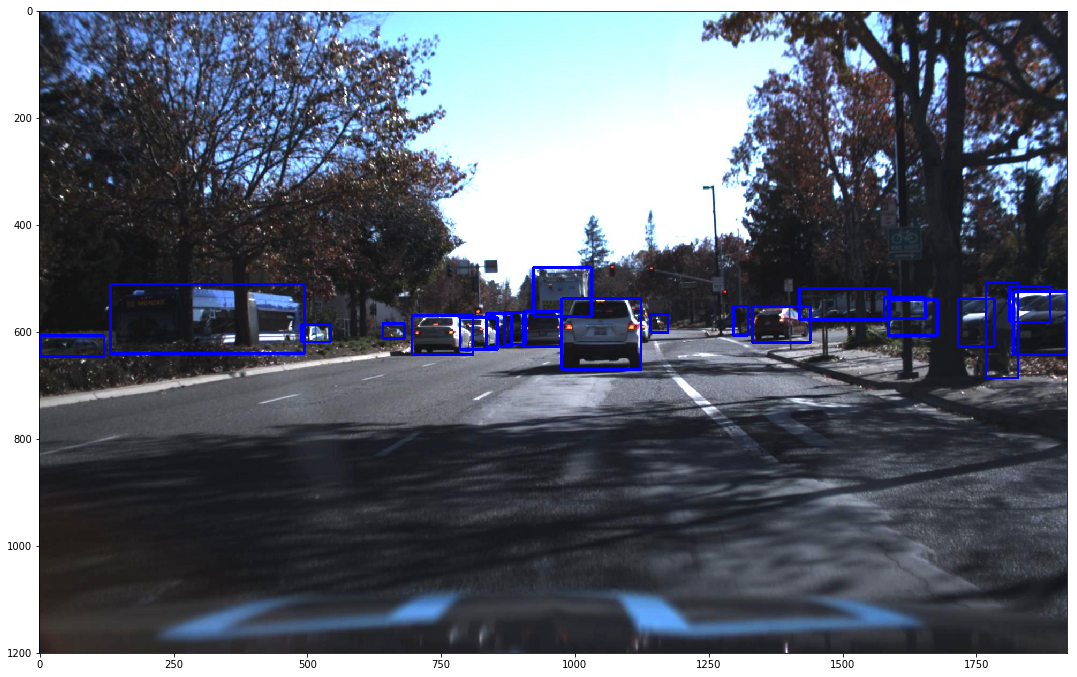

In [79]:
image_filename = './crowdai/'+images[200]
img = mpimg.imread(image_filename)

fig,ax = plt.subplots(1,figsize=(15, 10))
fig.tight_layout()
# Display the image


for i,row in df2.iterrows():
    
    rect = cv2.rectangle(img,(row.xmin,row.ymin),(row.xmax,row.ymax),(0,0,255),
                             thickness=3,lineType=8)
    #ax.add_patch(rect)


#cv2.rectangle(img,(905,785),(644,533),(0,0,255),thickness=3,lineType=8)
ax.imshow(img)
# Add the patch to the Axes
plt.show()

In [48]:
img.shape

(1200, 1920, 3)